In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.style.use('seaborn')

In [6]:
class Perceptron():
    """
    implementing the Preceptron Class
    """
    def __init__(self, X, y, numWeights, threshold, modelName, weights=None, maxIters=50, loadModel=False):
        trainOnes = np.ones((X.shape[0], 1))
        self.X = np.hstack((X, trainOnes)).astype('float')
        self.y = np.array([1 if i == 1 else -1 for i in y]).astype('float')
        self.numWeights = numWeights
        self.threshold = threshold
        self.maxIters = maxIters
        self.modelName = modelName
        if loadModel:
            self.weights, self.iters = self.loadModel()
        else:
            if weights is not None:
                self.weights = np.array(weights).astype('float')
            else:
                self.weights = np.array(np.random.normal(0, 1, numWeights + 1)).astype('float')
            self.iters = 0
    
    def plotGraph(self):
        """
        Function to plot the graph
        """
        x1 = [i[0] for i in self.X]
        if self.X.shape[1] == 1:
            x2 = [0 for i in range(self.X[0])]
        else:
            x2 = [i[1] for i in self.X]
        plt.scatter(x1, x2, c=self.y, cmap='coolwarm')

        if self.X.shape[1] == 3:
            x_ = np.linspace(-1, 2, 100)
            y_ = -(self.weights[2] + self.weights[0]*x_)/(self.weights[1]+1e-9)
            plt.plot(x_, y_, 'green')
        else:
            x_ = -(self.weights[1]/(self.weights[0] + 1e-9))
            x_ = np.linspace(x_, x_, 100)
            y_ = np.linspace(0, 2, 100)
            plt.plot(x_, y_, 'green')
        plt.show()

    def updateWeights(self):
        """
        Function to update the weights
        """
        for i in range(len(self.X)):
            if self.y[i]*np.dot(self.weights.T, self.X[i]) <= self.threshold:
                self.weights += (self.y[i] * self.X[i])
                return

    def checkConvergence(self):
        """
        Function to check if the model has converged
        """
        for i in range(len(self.X)):
            if self.y[i]*np.dot(self.weights.T, self.X[i]) <= self.threshold:
                return False
        return True

    def train(self):
        """
        Function to train the model
        """
        steps = 0
        while steps < self.maxIters:
            steps += 1
            print(f'\nIteration number: {self.iters}\nWeights: {self.weights}')
            self.plotGraph()
            if self.checkConvergence() == False:
                self.updateWeights()
            else:
                self.saveModel()
                return
            self.iters += 1
    
    def saveModel(self):
        """
        Function to save the model
        """
        model = {
            "name": self.modelName, 
            "iterations": self.iters,
            "weights": self.weights
        }
        with open(f'{self.modelName}.pickle', 'wb') as f:
            pickle.dump(model, f)

    def loadModel(self):
        """
        Function to load the model
        """
        with open(f'{self.modelName}.pickle', 'rb') as f:
            model = pickle.load(f)
            return model['weights'], model['iterations']


## AND Gate

In [7]:
# Data corresponding to AND Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])


Iteration number: 0
Weights: [-0.07481417  1.16455844  1.49239802]


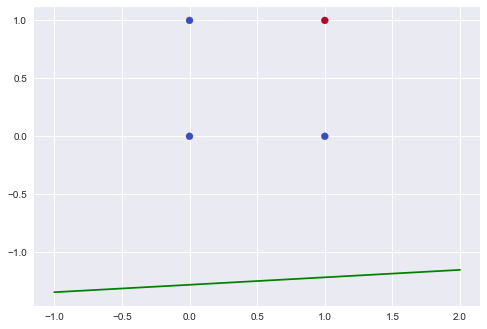


Iteration number: 1
Weights: [-0.07481417  1.16455844  0.49239802]


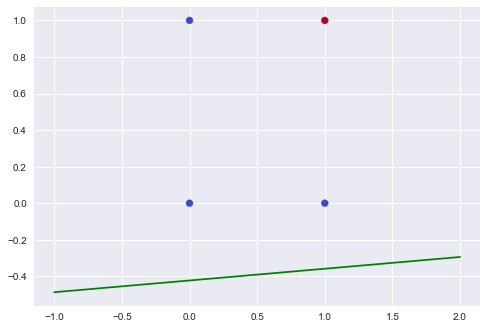


Iteration number: 2
Weights: [-0.07481417  1.16455844 -0.50760198]


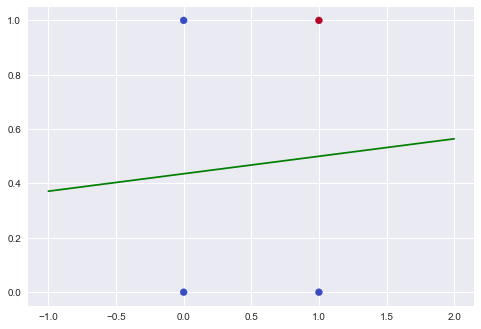


Iteration number: 3
Weights: [-0.07481417  0.16455844 -1.50760198]


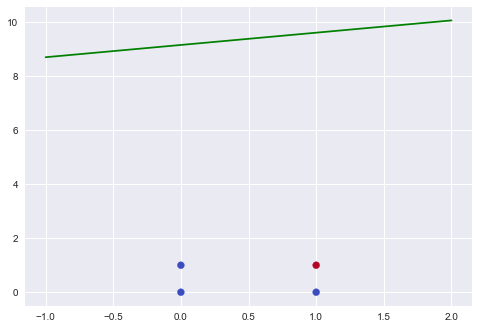


Iteration number: 4
Weights: [ 0.92518583  1.16455844 -0.50760198]


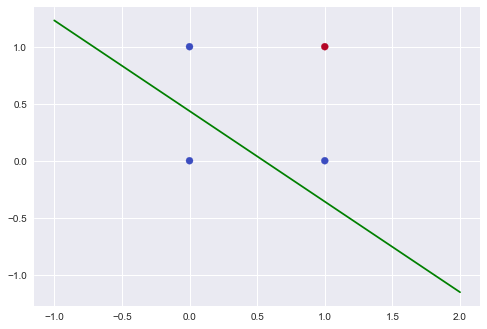


Iteration number: 5
Weights: [ 0.92518583  0.16455844 -1.50760198]


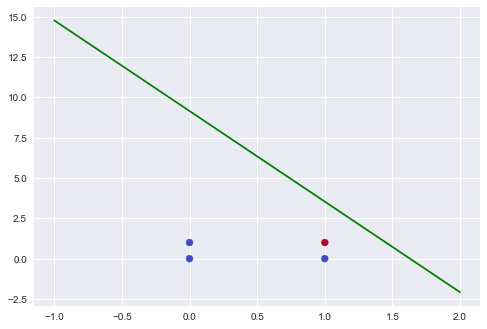


Iteration number: 6
Weights: [ 1.92518583  1.16455844 -0.50760198]


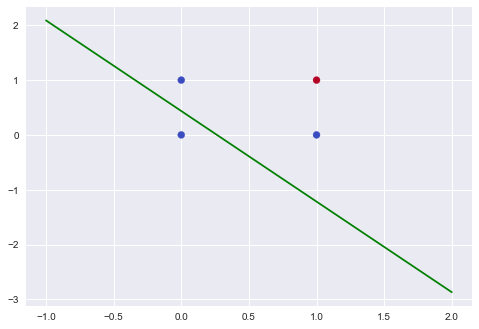


Iteration number: 7
Weights: [ 1.92518583  0.16455844 -1.50760198]


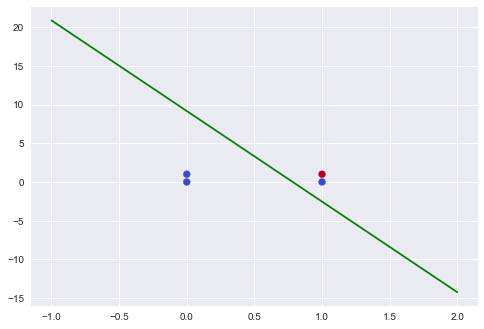


Iteration number: 8
Weights: [ 0.92518583  0.16455844 -2.50760198]


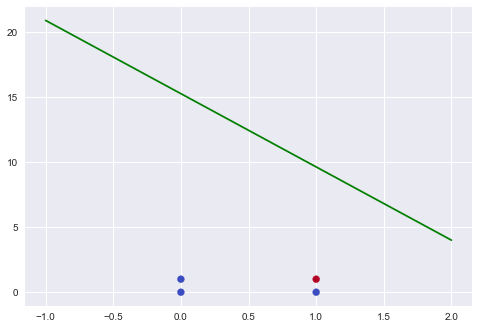


Iteration number: 9
Weights: [ 1.92518583  1.16455844 -1.50760198]


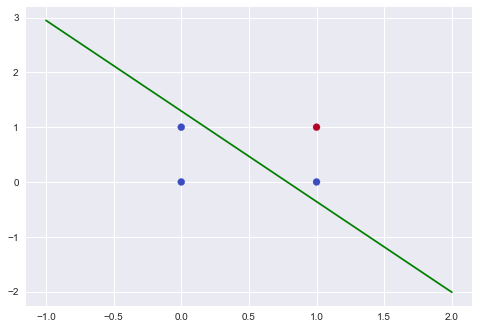


Iteration number: 10
Weights: [ 0.92518583  1.16455844 -2.50760198]


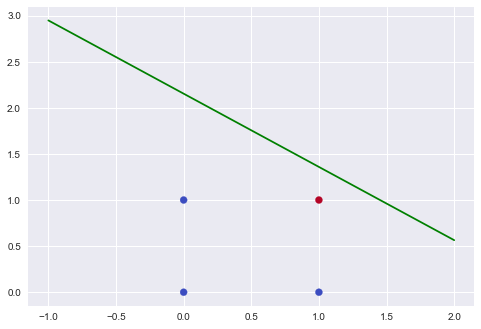


Iteration number: 11
Weights: [ 1.92518583  2.16455844 -1.50760198]


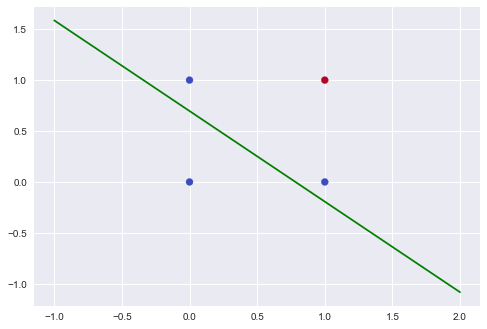


Iteration number: 12
Weights: [ 1.92518583  1.16455844 -2.50760198]


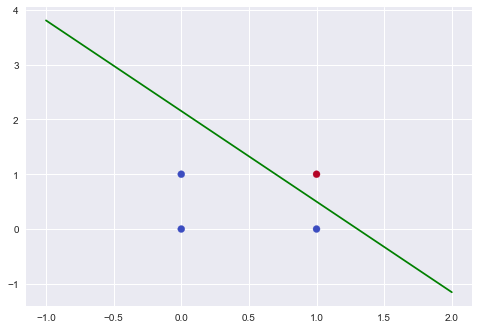

In [13]:
p = Perceptron(X=X, y=y, numWeights=2, threshold=0, modelName='andGate', loadModel=False)
p.train()

## OR Gate

In [14]:
# Data corresponding to OR Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])


Iteration number: 0
Weights: [ 0.05467284 -0.55496867 -1.27100611]


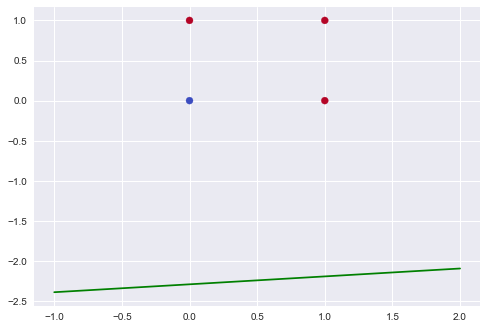


Iteration number: 1
Weights: [ 0.05467284  0.44503133 -0.27100611]


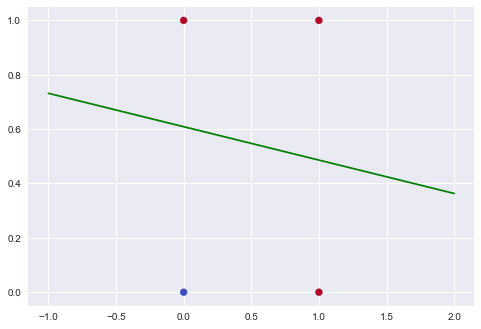


Iteration number: 2
Weights: [1.05467284 0.44503133 0.72899389]


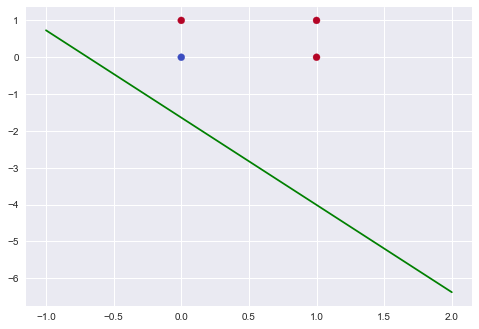


Iteration number: 3
Weights: [ 1.05467284  0.44503133 -0.27100611]


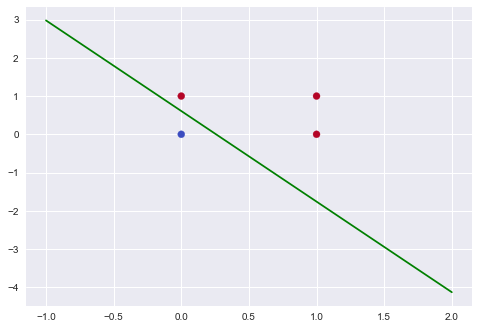

In [15]:
p = Perceptron(X=X, y=y, numWeights=2, threshold=0, modelName='orGate', loadModel=False)
p.train()

## NOT Gate

In [19]:
# Data corresponding to NOT Gate
X = np.array([[0], [1]])
y = np.array([1, 0])


Iteration number: 0
Weights: [3. 2.]


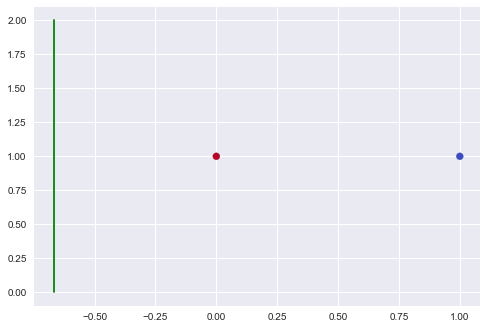


Iteration number: 1
Weights: [2. 1.]


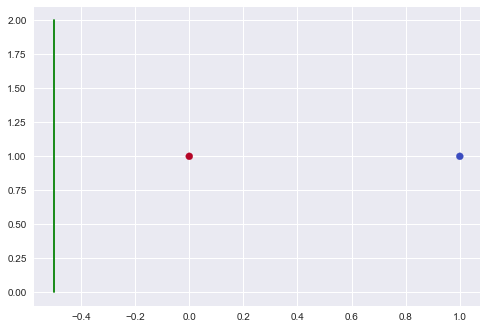


Iteration number: 2
Weights: [1. 0.]


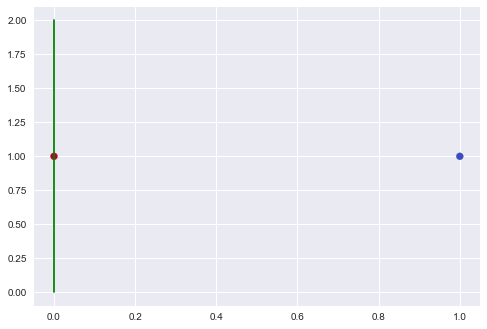


Iteration number: 3
Weights: [1. 1.]


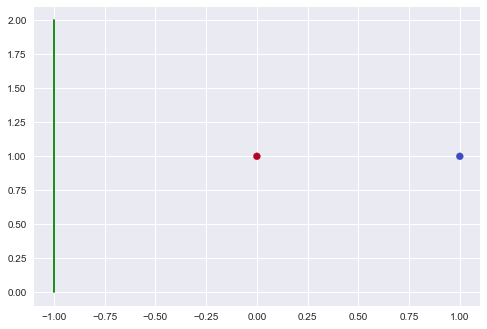


Iteration number: 4
Weights: [0. 0.]


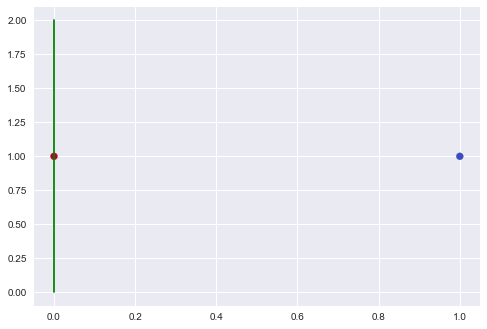


Iteration number: 5
Weights: [0. 1.]


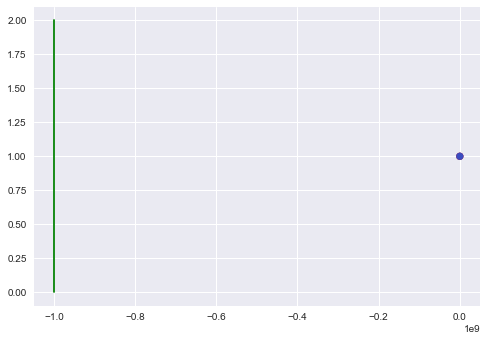


Iteration number: 6
Weights: [-1.  0.]


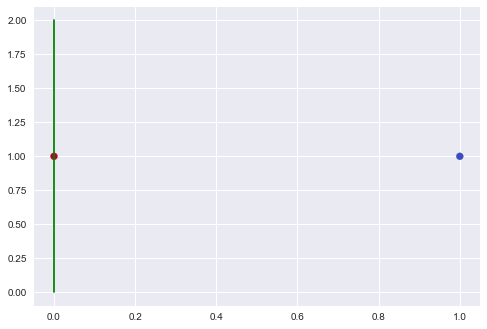


Iteration number: 7
Weights: [-1.  1.]


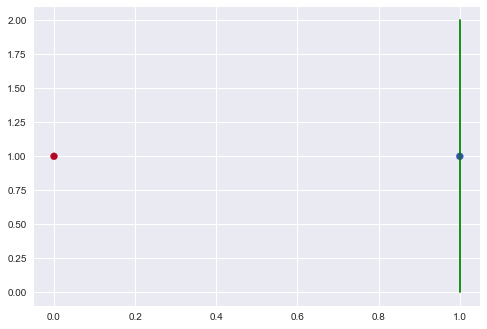


Iteration number: 8
Weights: [-2.  0.]


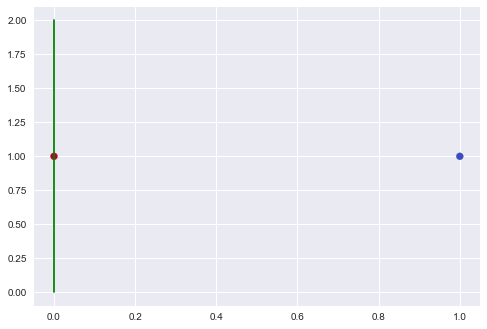


Iteration number: 9
Weights: [-2.  1.]


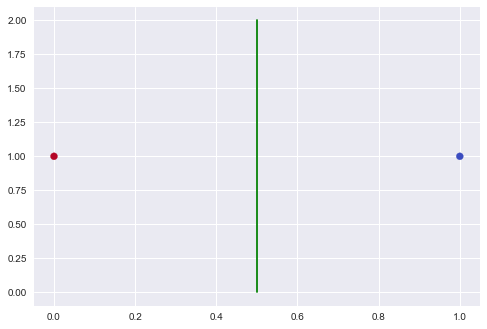

In [21]:
p = Perceptron(X=X, y=y, numWeights=1, threshold=0, weights=[3, 2], modelName='notGate', loadModel=False)
p.train()

## XOR Gate

In [22]:
# Data corresponding to AND Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


Iteration number: 0
Weights: [3. 2. 1.]


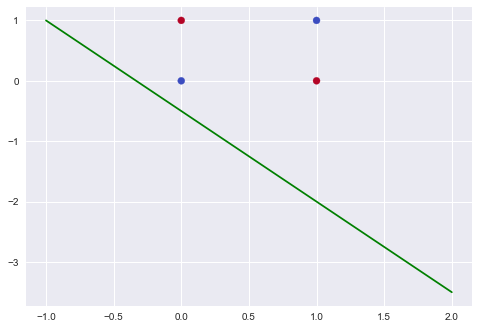


Iteration number: 1
Weights: [3. 2. 0.]


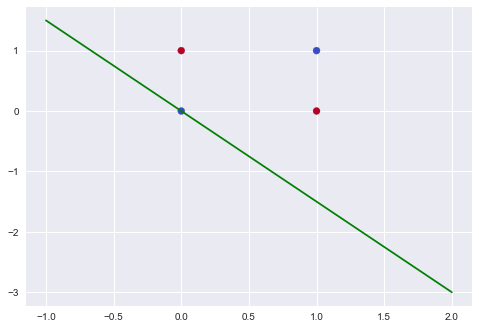


Iteration number: 2
Weights: [ 3.  2. -1.]


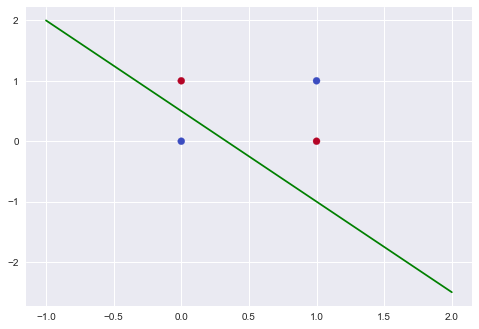


Iteration number: 3
Weights: [ 2.  1. -2.]


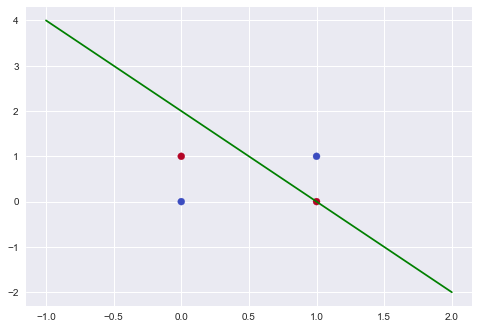


Iteration number: 4
Weights: [ 2.  2. -1.]


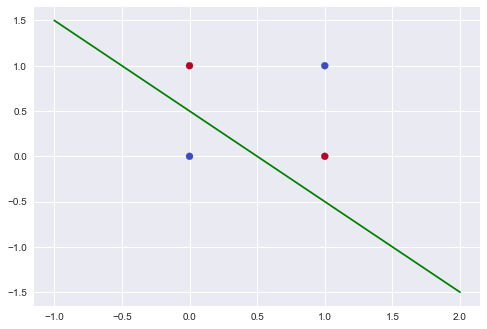


Iteration number: 5
Weights: [ 1.  1. -2.]


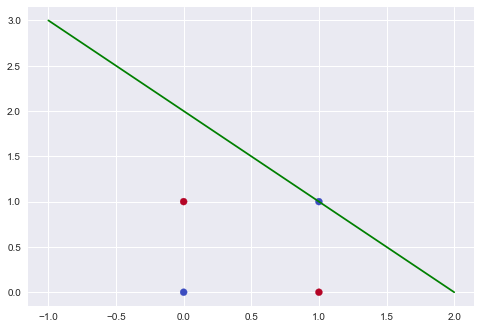


Iteration number: 6
Weights: [ 1.  2. -1.]


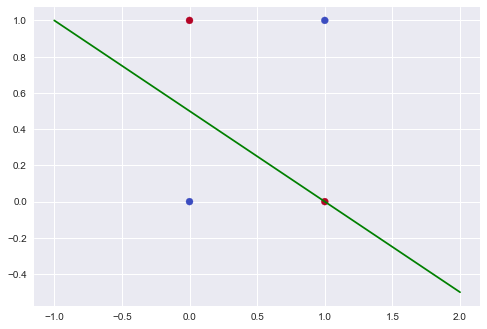


Iteration number: 7
Weights: [2. 2. 0.]


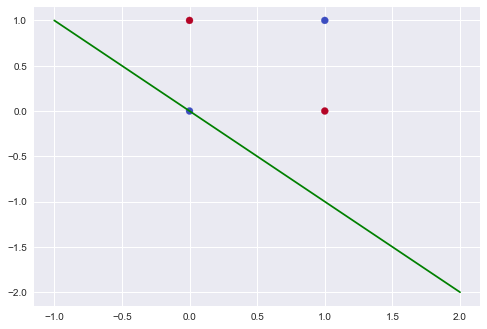


Iteration number: 8
Weights: [ 2.  2. -1.]


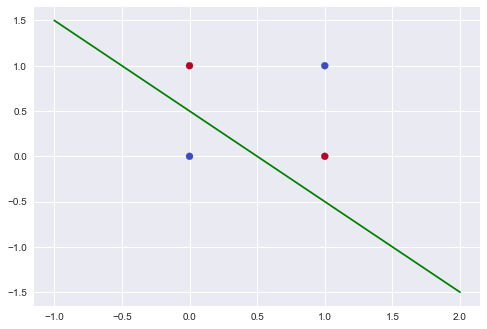


Iteration number: 9
Weights: [ 1.  1. -2.]


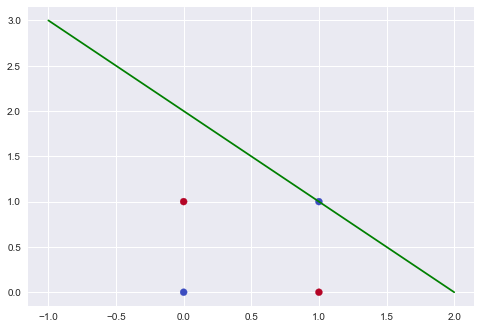


Iteration number: 10
Weights: [ 1.  2. -1.]


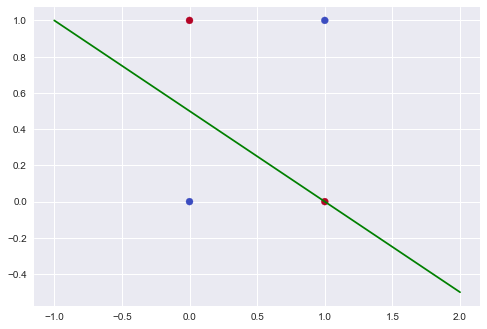


Iteration number: 11
Weights: [2. 2. 0.]


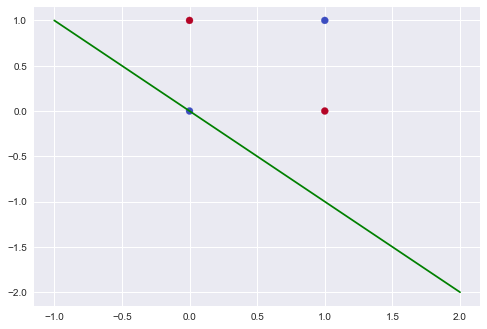


Iteration number: 12
Weights: [ 2.  2. -1.]


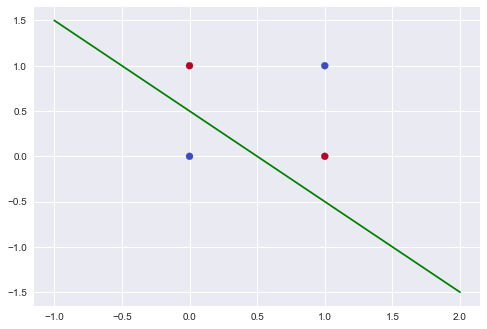


Iteration number: 13
Weights: [ 1.  1. -2.]


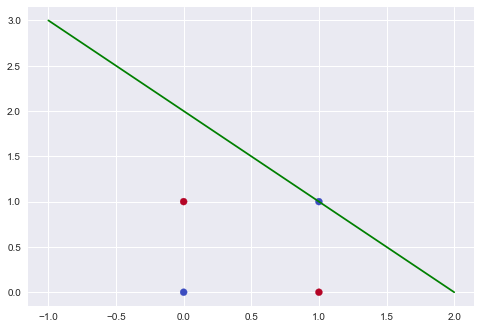


Iteration number: 14
Weights: [ 1.  2. -1.]


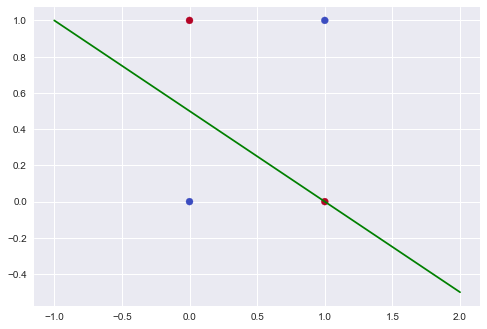


Iteration number: 15
Weights: [2. 2. 0.]


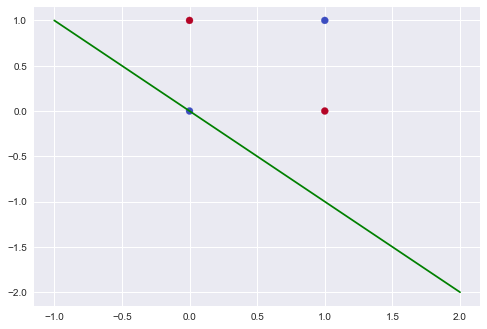


Iteration number: 16
Weights: [ 2.  2. -1.]


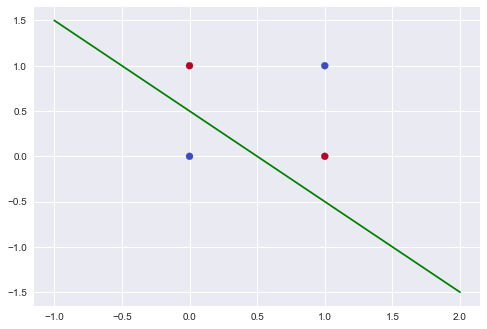


Iteration number: 17
Weights: [ 1.  1. -2.]


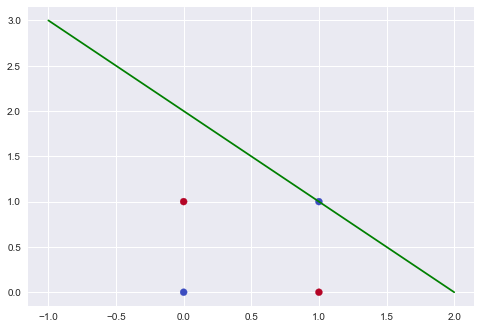


Iteration number: 18
Weights: [ 1.  2. -1.]


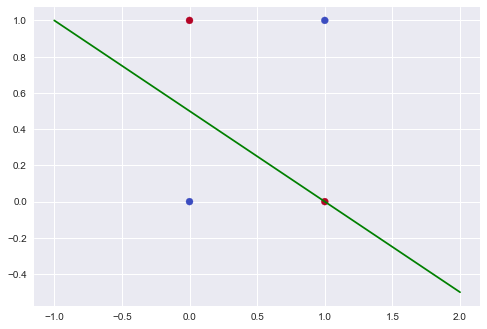


Iteration number: 19
Weights: [2. 2. 0.]


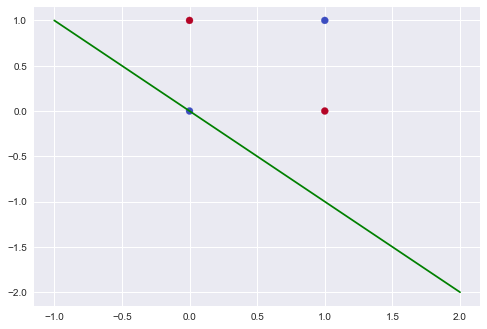


Iteration number: 20
Weights: [ 2.  2. -1.]


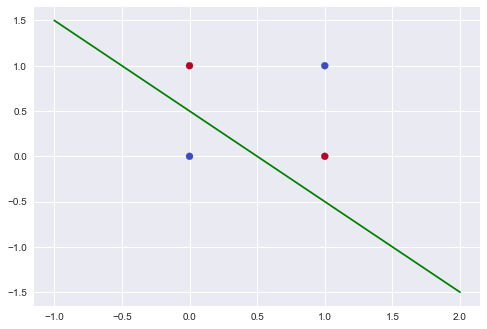


Iteration number: 21
Weights: [ 1.  1. -2.]


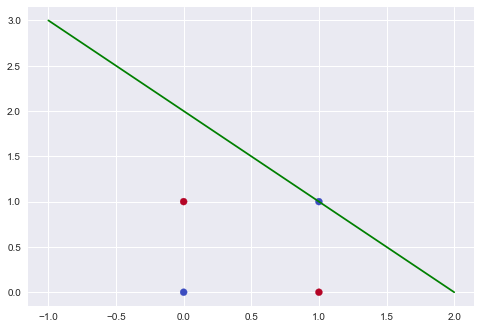


Iteration number: 22
Weights: [ 1.  2. -1.]


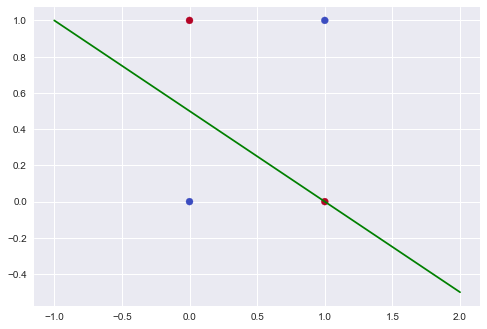


Iteration number: 23
Weights: [2. 2. 0.]


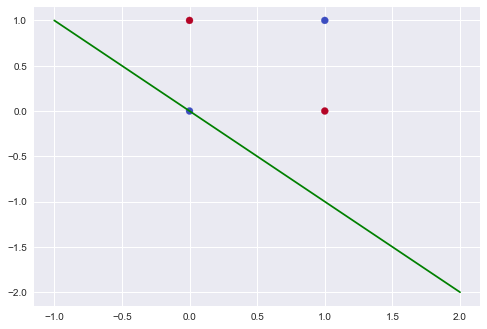


Iteration number: 24
Weights: [ 2.  2. -1.]


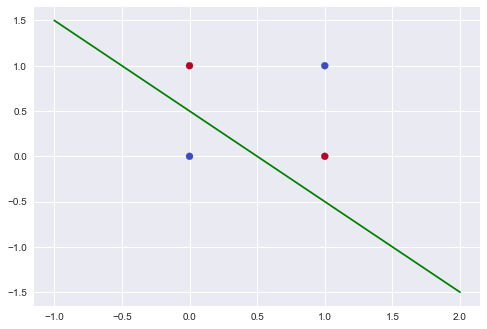


Iteration number: 25
Weights: [ 1.  1. -2.]


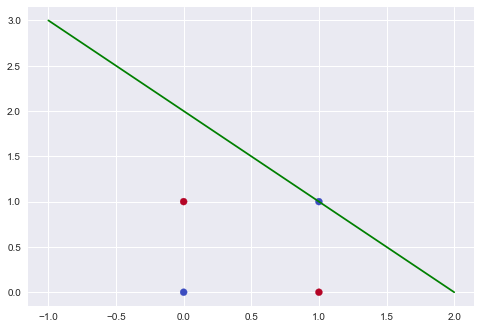


Iteration number: 26
Weights: [ 1.  2. -1.]


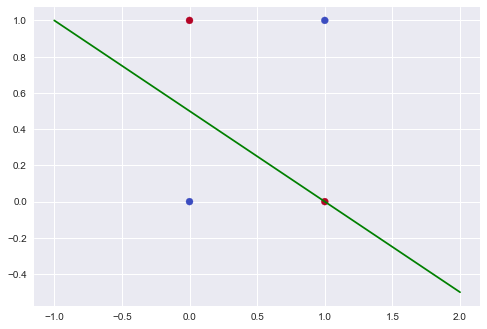


Iteration number: 27
Weights: [2. 2. 0.]


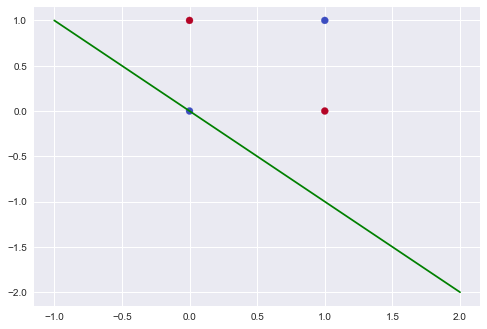


Iteration number: 28
Weights: [ 2.  2. -1.]


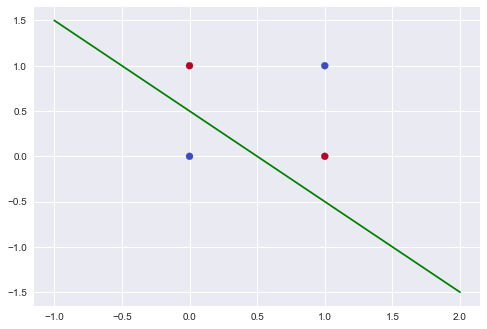


Iteration number: 29
Weights: [ 1.  1. -2.]


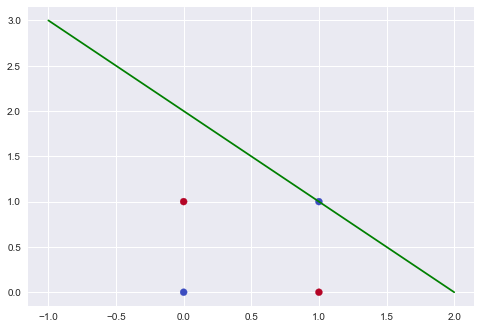


Iteration number: 30
Weights: [ 1.  2. -1.]


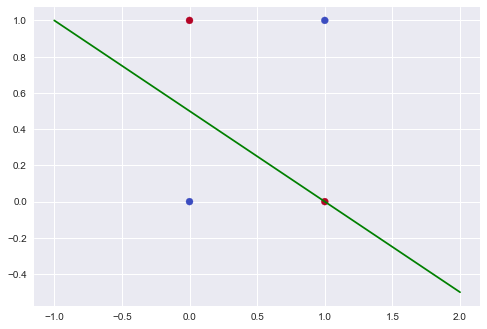


Iteration number: 31
Weights: [2. 2. 0.]


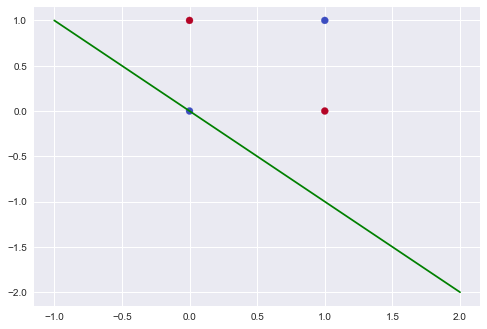


Iteration number: 32
Weights: [ 2.  2. -1.]


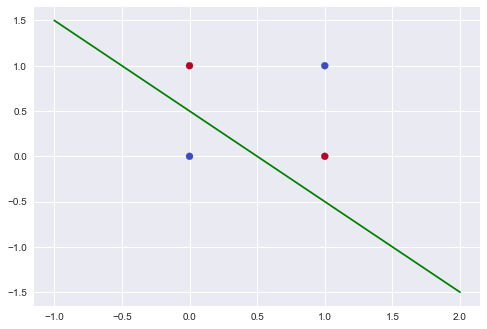


Iteration number: 33
Weights: [ 1.  1. -2.]


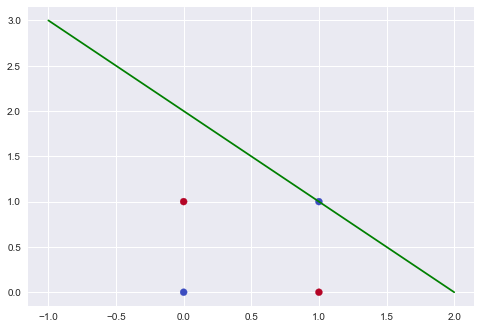


Iteration number: 34
Weights: [ 1.  2. -1.]


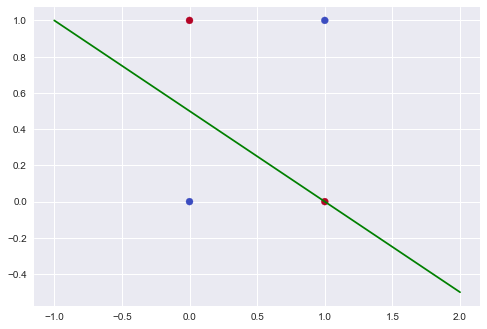


Iteration number: 35
Weights: [2. 2. 0.]


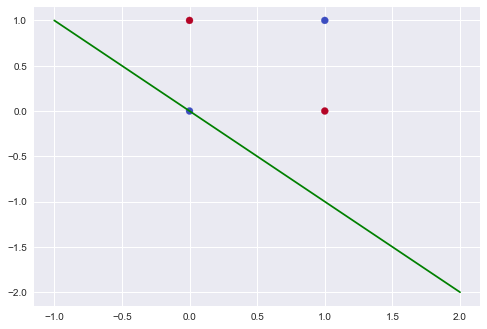


Iteration number: 36
Weights: [ 2.  2. -1.]


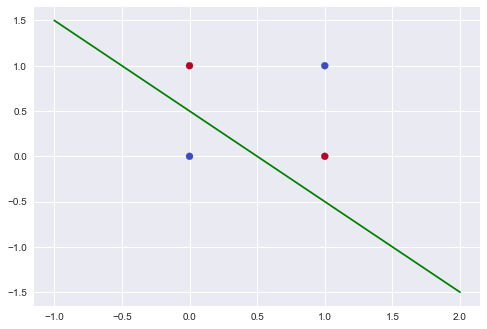


Iteration number: 37
Weights: [ 1.  1. -2.]


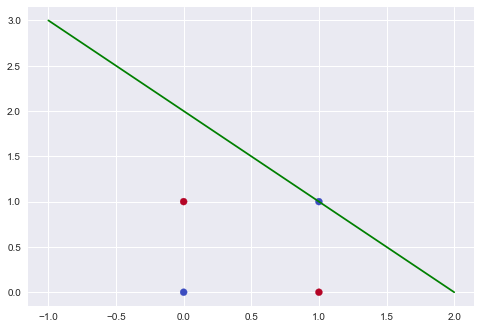


Iteration number: 38
Weights: [ 1.  2. -1.]


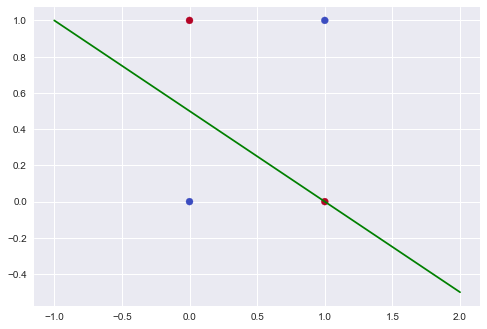


Iteration number: 39
Weights: [2. 2. 0.]


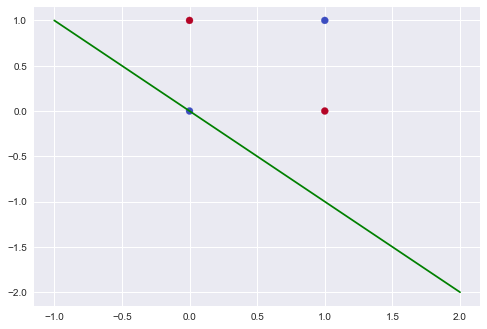


Iteration number: 40
Weights: [ 2.  2. -1.]


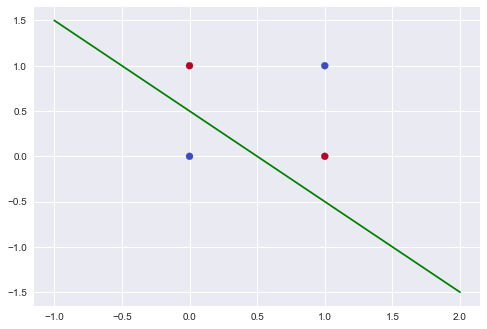


Iteration number: 41
Weights: [ 1.  1. -2.]


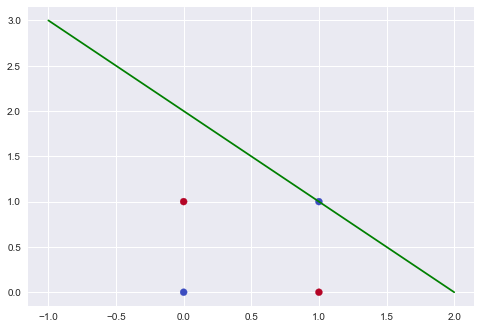


Iteration number: 42
Weights: [ 1.  2. -1.]


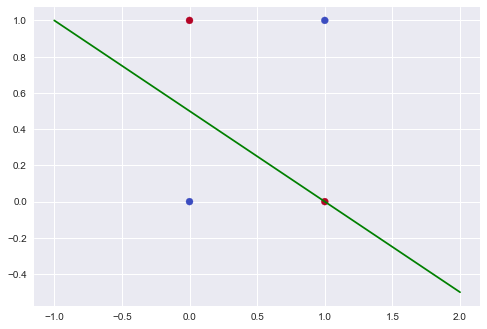


Iteration number: 43
Weights: [2. 2. 0.]


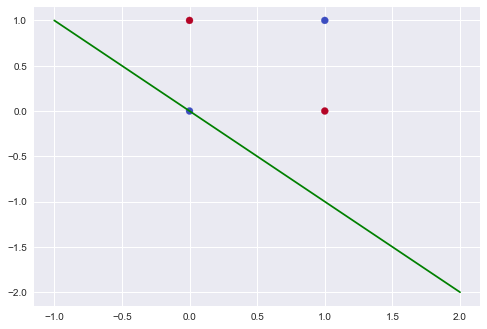


Iteration number: 44
Weights: [ 2.  2. -1.]


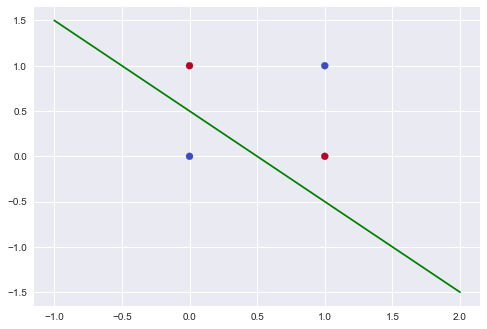


Iteration number: 45
Weights: [ 1.  1. -2.]


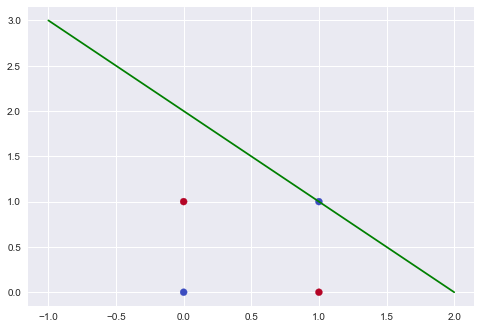


Iteration number: 46
Weights: [ 1.  2. -1.]


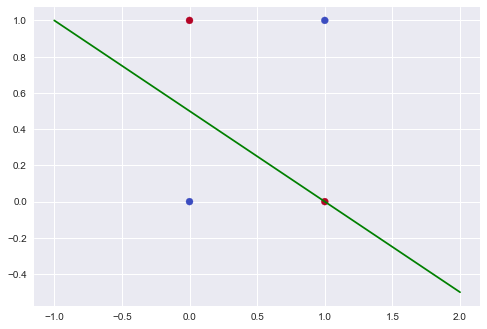


Iteration number: 47
Weights: [2. 2. 0.]


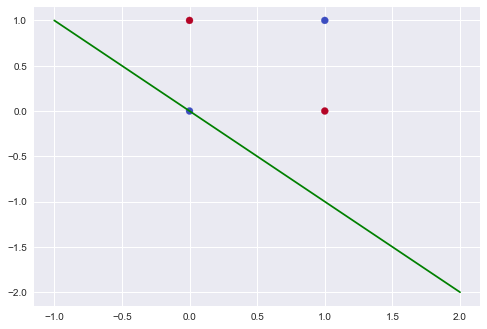


Iteration number: 48
Weights: [ 2.  2. -1.]


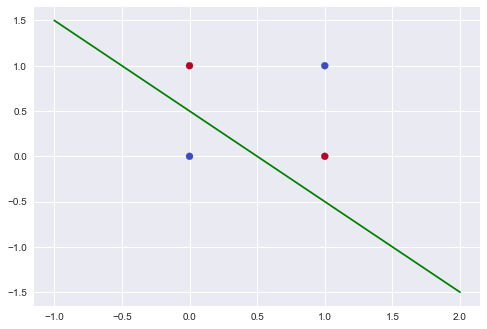


Iteration number: 49
Weights: [ 1.  1. -2.]


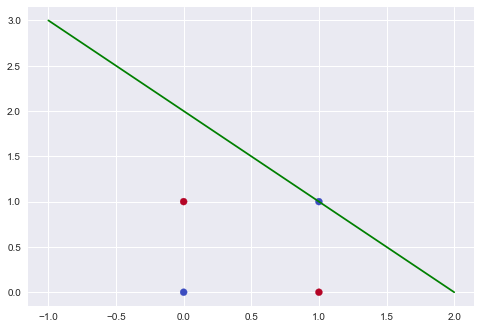

In [24]:
p = Perceptron(X=X, y=y, numWeights=2, threshold=0, weights=[3,2,1], modelName='xorGate', loadModel=False)
p.train()

In [98]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [99]:
X = np.array([[0], [1]])
y = np.array([1, 0])

In [100]:
p = Perceptron(X, y, 1, 0, weights=[3,2], modelName='notGate', loadModel=True)
print(p.weights)
print(p.weights.shape)
print(p.X)
print(p.X[0].shape)
print(p.y)

[-2.  1.]
(2,)
[[0. 1.]
 [1. 1.]]
(2,)
[ 1. -1.]



Iteration number: 11
Weights: [-2.  1.]


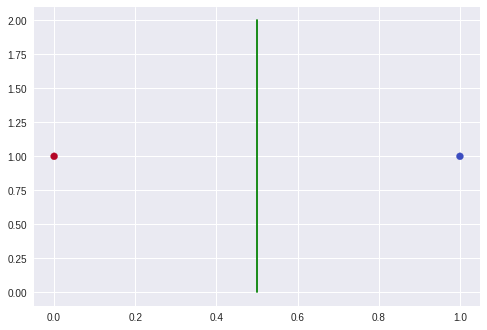

In [101]:
p.train()

In [26]:
print(p.weights)
print(p.X)
print(p.y)
print(p.threshold)

[-0.9  0.1]
[[0. 1.]
 [1. 1.]]
[ 1 -1]
0
